In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/tas_history.csv')

In [36]:
winners = df[(df['Electorate'] != 'Tasmania') & (df['Seats'] > 0)]

In [7]:
df

,Year,Election,Electorate,Primary vote,Seats
0,2018,State,Bass,9.3,0
1,2018,State,Braddon,3.6,0
2,2018,State,Clark,17.5,1
3,2018,State,Franklin,14.4,1
4,2018,State,Lyons,6.5,0
5,2018,State,Tasmania,10.3,2
6,2014,State,Bass,12.7,1
7,2014,State,Braddon,7.0,0
8,2014,State,Clark,21.2,1
9,2014,State,Franklin,16.8,1


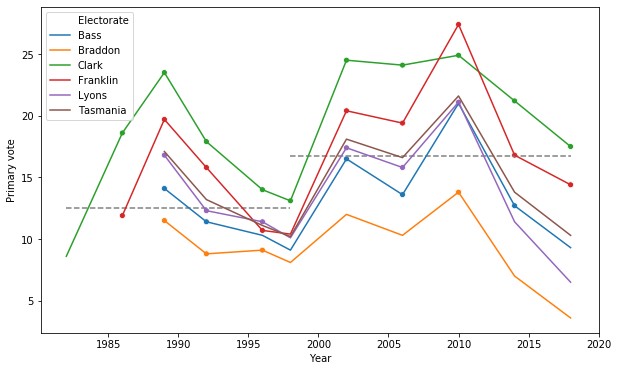

In [43]:
plt.figure(figsize=[10, 6])
sns.lineplot(x="Year", y="Primary vote", hue="Electorate", data=df)
sns.scatterplot(x="Year", y="Primary vote", hue="Electorate", legend=False,
                data=winners.sort_values(by=['Electorate']))
plt.hlines(16.7, 1998, 2018, colors='0.5', linestyles='dashed')
plt.hlines(12.5, 1982, 1998, colors='0.5', linestyles='dashed')
plt.show()